# Creating a Word Map for Selecting Relevant Terms for Challenge 1
- Pulls the text file  derived from Challenge 2, converts the text into a readable string to form the wordcloud
- We filter the string from punctuation and stopwords to improve relevance

In [41]:
filename = 'C:/git_repo/Not-The-Corona-Virus-team-repo/Challenge2/data/CDCGuidelines.txt'

with open(filename, encoding="utf8") as myFile:
    data = myFile.read()
data = data.split()
data

['***Things',
 'to',
 'know',
 'about',
 'the',
 'COVID-19',
 'Pandemic',
 'Three',
 'Important',
 'Ways',
 'to',
 'Slow',
 'the',
 'Spread',
 'Wear',
 'a',
 'mask',
 'to',
 'protect',
 'yourself',
 'and',
 'others',
 'and',
 'stop',
 'the',
 'spread',
 'of',
 'COVID-19.',
 'Stay',
 'at',
 'least',
 '6',
 'feet',
 '(about',
 '2',
 'arm',
 'lengths)',
 'from',
 'others',
 'who',
 'don’t',
 'live',
 'with',
 'you.',
 'Avoid',
 'crowds.',
 'The',
 'more',
 'people',
 'you',
 'are',
 'in',
 'contact',
 'with,',
 'the',
 'more',
 'likely',
 'you',
 'are',
 'to',
 'be',
 'exposed',
 'to',
 'COVID-19.',
 'How',
 'to',
 'Protect',
 'Yourself',
 'When',
 'Going',
 'Out',
 'Wear',
 'a',
 'mask',
 'that',
 'covers',
 'your',
 'nose',
 'and',
 'mouth',
 'to',
 'help',
 'protect',
 'yourself',
 'and',
 'others.',
 'Stay',
 '6',
 'feet',
 'apart',
 'from',
 'others',
 'who',
 'don’t',
 'live',
 'with',
 'you.',
 'Avoid',
 'crowds.',
 'Avoid',
 'poorly',
 'ventilated',
 'indoor',
 'spaces.',
 'Wash',

In [42]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

# removes punctuation/etc from the DF
def nlpCleanup(df,col_name):
    df[col_name] = df[col_name].replace(r'(\b\w{1,2}\b)', '',regex=True) # for word length lt 2
    df[col_name] = df[col_name].replace('[^\w\s]', '',regex=True) # for punctuation 
    df[col_name] = df[col_name].apply(removeStopWords)
    return df

# removes stop words from the text. May be useful. Received from Jaimie
def removeStopWords(text):
    returnText = ''
    for w in text.split(' '):
        if w not in en_stops and len(w)>0:
            returnText += ' ' + w
    returnText = returnText.strip()
    return returnText

In [46]:
# Get a pandas DataFrame object of all the data in the csv file:
import pandas as pd
from nltk.corpus import stopwords
en_stops = set(stopwords.words('english'))

#convert to dataframe to pass through functions
data_f = pd.DataFrame(data)
data_f = data_f[data_f[0] != en_stops]
data_f = nlpCleanup(data_f, 0)
data_f = data_f[data_f[0] != '']

#convert back to string to pass through WordCloud
data_list = data_f[0].to_list()
data_string = ' '.join(data_list)
data_string

'Things know COVID Pandemic Three Important Ways Slow Spread Wear mask protect others stop spread COVID Stay least feet arm lengths others live Avoid crowds The people contact likely exposed COVID How Protect Yourself When Going Out Wear mask covers nose mouth help protect others Stay feet apart others live Avoid crowds Avoid poorly ventilated indoor spaces Wash hands often soap water Use hand sanitizer soap water available You Risk Getting Very Sick People age get COVID even healthy young adults children People older certain underlying medical conditions higher risk getting sick COVID Other groups may higher risk getting COVID severe illness What You Sick Stay home except get medical care Isolate members family prevent spread people may contact like grandparents Even feel sick spread COVID others Get care immediately emergency warning signs like trouble breathing pain pressure chest How Get Test Current Infection You visit state local health department website look latest local inform

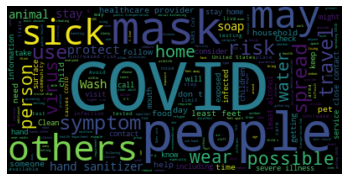

In [44]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

#Creating the wordmap
wordcloud = WordCloud().generate(data2)
wordcloud


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
